<font size="+5">#01 | Why Neural Networks Deeply Learn a Mathematical Formula</font>

- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Discipline to Search Solutions in Google

> Apply the following steps when **looking for solutions in Google**:
>
> 1. **Necesity**: How to load an Excel in Python?
> 2. **Search in Google**: by keywords
>   - `load excel python`
>   - ~~how to load excel in python~~
> 3. **Solution**: What's the `function()` that loads an Excel in Python?
>   - A Function to Programming is what the Atom to Phisics.
>   - Every time you want to do something in programming
>   - **You will need a `function()`** to make it
>   - Theferore, you must **detect parenthesis `()`**
>   - Out of all the words that you see in a website
>   - Because they indicate the presence of a `function()`.

# Machine Learning, what does it mean?

> - The Machine Learns...
>
> But, **what does it learn?**

In [29]:
%%HTML
<blockquote class="twitter-tweet" data-lang="en"><p lang="en" dir="ltr">Machine Learning, what does it mean? ⏯<br><br>· The machine learns...<br><br>Ha ha, not funny! 🤨 What does it learn?<br><br>· A mathematical equation. For example: <a href="https://t.co/sjtq9F2pq7">pic.twitter.com/sjtq9F2pq7</a></p>&mdash; Jesús López (@sotastica) <a href="https://twitter.com/sotastica/status/1449735653328031745?ref_src=twsrc%5Etfw">October 17, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script>

# How does the Machine Learn?

## In a Linear Regression

In [30]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Ht3rYS-JilE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## In a Neural Network

In [31]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=329" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A Practical Example → [Tesla Autopilot](https://www.tesla.com/AI)

An Example where It Fails → [Tesla Confuses Moon with Semaphore](https://twitter.com/Carnage4Life/status/1418920100086784000?s=20)

# Load the Data

> - Simply execute the following lines of code to load the data.
> - This dataset contains **statistics about Car Accidents** (columns)
> - In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [32]:
import seaborn as sns

df = sns.load_dataset(name='car_crashes', index_col='abbrev')
df.sample(5)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
CT,10.8,4.968,3.888,9.396,8.856,1068.73,167.02
VA,12.7,2.413,3.429,11.049,11.176,768.95,153.72
NY,12.3,3.936,3.567,10.824,9.840,1234.31,150.01
GA,15.6,2.964,3.900,14.820,14.508,913.15,142.80
DE,16.2,6.156,4.860,14.094,16.038,1137.87,151.48


## Fit a Neural Network Model in Python

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Initialize the `weights` to start in 0

> - `kernel_initializer='zeros'` on second `Dense` layer

In [35]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu', kernel_initializer='zeros'))
model.add(Dense(1, activation='sigmoid'))

### Make a Prediction

In [36]:
model.predict()

TypeError: predict() missing 1 required positional argument: 'x'

In [37]:
X = df.drop(columns='total')
y = df.total

In [38]:
AL = X[:1].copy()

In [39]:
df[:1]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,,
AL,18.8,7.332,5.64,18.048,15.04,784.55,145.08


In [40]:
AL

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
abbrev,,,,,,
AL,7.332,5.64,18.048,15.04,784.55,145.08


In [41]:
model.predict(x=AL)

2022-01-11 12:31:54.238525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0.5]], dtype=float32)

### Predict for All USA States

In [42]:
y_pred = model.predict(x=X)

In [43]:
dfsel = df[['total']].copy()
dfsel['initial_pred'] = y_pred
dfsel.head()

,total,initial_pred
abbrev,,
AL,18.8,0.5
AK,18.1,0.5
AZ,18.6,0.5
AR,22.4,0.5
CA,12.0,0.5


> - [ ] Why are these predictions so far away from reality?

### Fit the Mathematical Equation of the Model

$$
accidents = speeding \cdot w_1 + alcohol \cdot w_2 \ + ... + \ ins\_losses \cdot w_7
$$

> In other words: calculate the `best numbers` for the `weights`

In [44]:
model.fit(X, y, epochs=500)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [46]:
model.fit(X, y, epochs=500)

Epoch 1/500


2022-01-11 12:33:12.161541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 65ms/step - loss: 0.6872 - accuracy: 0.0000e+00
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 0.6572 - accuracy: 0.0000e+00
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 0.6262 - accuracy: 0.0000e+00
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 0.5962 - accuracy: 0.0000e+00
Epoch 5/500
2/2 [==============================] - 0s 5ms/step - loss: 0.5651 - accuracy: 0.0000e+00
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.0000e+00
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 0.5037 - accuracy: 0.0000e+00
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 0.4733 - accuracy: 0.0000e+00
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 0.4427 - accuracy: 0.0000e+00
Epoch 10/500
2/2 [==============================] - 0s 5ms/step - loss: 0.4125 - accuracy: 0.0000e+00


#### Predictions vs Reality **After `fit()`**

In [47]:
y_pred = model.predict(X)

2022-01-11 12:34:19.108279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [48]:
dfsel['pred_after_fit'] = y_pred
dfsel.head()

,total,initial_pred,pred_after_fit
abbrev,,,
AL,18.8,0.5,0.73024
AK,18.1,0.5,0.73024
AZ,18.6,0.5,0.73024
AR,22.4,0.5,0.73024
CA,12.0,0.5,0.73024


#### Observe the numbers for the `weights`

> - Have they changed?

In [49]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.6043488 ],
        [-0.06645387],
        [ 0.49008608],
        [ 0.5926229 ],
        [ 0.6011095 ],
        [-0.48289979],
        [ 0.21052301],
        [-0.03000039],
        [ 0.23048395],
        [-0.6410422 ],
        [ 0.66076636],
        [ 0.37151527]], dtype=float32),
 array([0.99584275], dtype=float32)]

#### Loss

> - They are synonyms:
> - Cost | Error | Loss
> - https://keras.io/api/losses/

#### `binary_crossentropy`

#### `sparse_categorical_crossentropy`

#### `mean_absolute_error`

#### `mean_squared_error`

In [50]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=206" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

#### Change the `loss` accordingly to your Data

In [54]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu', kernel_initializer='zeros'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [56]:
model.fit(X, y, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 14ms/step - loss: 250.4451 - mse: 250.4451
Epoch 2/500
2/2 [==============================] - 0s 4ms/step - loss: 250.4297 - mse: 250.4297
Epoch 3/500
2/2 [==============================] - 0s 4ms/step - loss: 250.4145 - mse: 250.4145
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 250.3993 - mse: 250.3993
Epoch 5/500
2/2 [==============================] - 0s 4ms/step - loss: 250.3840 - mse: 250.3840
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 250.3684 - mse: 250.3684
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 250.3534 - mse: 250.3534
Epoch 8/500
2/2 [==============================] - 0s 5ms/step - loss: 250.3380 - mse: 250.3380
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 250.3227 - mse: 250.3227
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 250.3075 - mse: 250.3075
Epoch 11/500
2/2 [====================

2022-01-11 12:37:14.818974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 6ms/step - loss: 250.2616 - mse: 250.2616
Epoch 14/500
2/2 [==============================] - 0s 5ms/step - loss: 250.2464 - mse: 250.2464
Epoch 15/500
2/2 [==============================] - 0s 5ms/step - loss: 250.2309 - mse: 250.2309
Epoch 16/500
2/2 [==============================] - 0s 5ms/step - loss: 250.2157 - mse: 250.2157
Epoch 17/500
2/2 [==============================] - 0s 4ms/step - loss: 250.2004 - mse: 250.2004
Epoch 18/500
2/2 [==============================] - 0s 4ms/step - loss: 250.1852 - mse: 250.1852
Epoch 19/500
2/2 [==============================] - 0s 4ms/step - loss: 250.1699 - mse: 250.1699
Epoch 20/500
2/2 [==============================] - 0s 4ms/step - loss: 250.1547 - mse: 250.1547
Epoch 21/500
2/2 [==============================] - 0s 4ms/step - loss: 250.1393 - mse: 250.1393
Epoch 22/500
2/2 [==============================] - 0s 4ms/step - loss: 250.1241 - mse: 250.1241
Epoch 23/500
2/2 [=========================

> - [ ] Why is the model not improving as it iterates (**deep**ly **learn**s)?
> - [ ] How can we solve this problem?

## Play with the Activation Function

> - https://keras.io/api/layers/activations/

In [57]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=29" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [58]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=182" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Configure `linear` activation in last layer

In [59]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu', kernel_initializer='zeros'))
model.add(Dense(1, activation='linear'))

#### Observe the `weights` (numbers) on the Mathematical Equation

$$
accidents = speeding \cdot w_1 + alcohol \cdot w_2 \ + ... + \ ins\_losses \cdot w_7
$$

In [60]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.0037806 ],
        [-0.09828407],
        [ 0.3429786 ],
        [-0.4515835 ],
        [-0.23184407],
        [ 0.10979211],
        [-0.38510633],
        [-0.6206576 ],
        [-0.5009832 ],
        [-0.48230162],
        [ 0.5879469 ],
        [ 0.2460075 ]], dtype=float32),
 array([0.], dtype=float32)]

#### Predictions vs Reality

> 1. Calculate the Predicted Accidents and

In [61]:
y_pred = model.predict(X)

2022-01-11 12:55:48.293657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


> 2. Compare it with the Real Total Accidents

In [62]:
dfsel = df[['total']].copy()

In [63]:
dfsel['pred_initial'] = y_pred
dfsel.head()

,total,pred_initial
abbrev,,
AL,18.8,0.0
AK,18.1,0.0
AZ,18.6,0.0
AR,22.4,0.0
CA,12.0,0.0


### `compile()` the Model

In [65]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

#### `fit()` the Model

In [66]:
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
2/2 - 0s - loss: 265.9763 - mse: 265.9763
Epoch 2/500
2/2 - 0s - loss: 265.9126 - mse: 265.9126
Epoch 3/500
2/2 - 0s - loss: 265.8492 - mse: 265.8492
Epoch 4/500
2/2 - 0s - loss: 265.7868 - mse: 265.7868
Epoch 5/500
2/2 - 0s - loss: 265.7239 - mse: 265.7239
Epoch 6/500
2/2 - 0s - loss: 265.6612 - mse: 265.6612
Epoch 7/500
2/2 - 0s - loss: 265.5970 - mse: 265.5970
Epoch 8/500
2/2 - 0s - loss: 265.5343 - mse: 265.5343
Epoch 9/500
2/2 - 0s - loss: 265.4720 - mse: 265.4720
Epoch 10/500
2/2 - 0s - loss: 265.4084 - mse: 265.4084
Epoch 11/500
2/2 - 0s - loss: 265.3456 - mse: 265.3456
Epoch 12/500
2/2 - 0s - loss: 265.2827 - mse: 265.2827
Epoch 13/500
2/2 - 0s - loss: 265.2204 - mse: 265.2204
Epoch 14/500
2/2 - 0s - loss: 265.1571 - mse: 265.1571
Epoch 15/500
2/2 - 0s - loss: 265.0932 - mse: 265.0932
Epoch 16/500
2/2 - 0s - loss: 265.0304 - mse: 265.0304
Epoch 17/500
2/2 - 0s - loss: 264.9682 - mse: 264.9682


2022-01-11 12:56:58.603572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 18/500
2/2 - 0s - loss: 264.9058 - mse: 264.9058
Epoch 19/500
2/2 - 0s - loss: 264.8427 - mse: 264.8427
Epoch 20/500
2/2 - 0s - loss: 264.7797 - mse: 264.7797
Epoch 21/500
2/2 - 0s - loss: 264.7170 - mse: 264.7170
Epoch 22/500
2/2 - 0s - loss: 264.6543 - mse: 264.6543
Epoch 23/500
2/2 - 0s - loss: 264.5913 - mse: 264.5913
Epoch 24/500
2/2 - 0s - loss: 264.5283 - mse: 264.5283
Epoch 25/500
2/2 - 0s - loss: 264.4660 - mse: 264.4660
Epoch 26/500
2/2 - 0s - loss: 264.4038 - mse: 264.4038
Epoch 27/500
2/2 - 0s - loss: 264.3411 - mse: 264.3411
Epoch 28/500
2/2 - 0s - loss: 264.2783 - mse: 264.2783
Epoch 29/500
2/2 - 0s - loss: 264.2149 - mse: 264.2149
Epoch 30/500
2/2 - 0s - loss: 264.1523 - mse: 264.1523
Epoch 31/500
2/2 - 0s - loss: 264.0900 - mse: 264.0900
Epoch 32/500
2/2 - 0s - loss: 264.0270 - mse: 264.0270
Epoch 33/500
2/2 - 0s - loss: 263.9641 - mse: 263.9641
Epoch 34/500
2/2 - 0s - loss: 263.9008 - mse: 263.9008
Epoch 35/500
2/2 - 0s - loss: 263.8385 - mse: 263.8386
Epoch 36/5

#### Predictions vs Reality **After fit()**

In [ ]:
y_pred = model.predict(X)

In [28]:
dfsel['pred_after_fit'] = y_pred
dfsel.head()

,total,initial_pred
abbrev,,
AL,18.8,0.5
AK,18.1,0.5
AZ,18.6,0.5
AR,22.4,0.5
CA,12.0,0.5


#### Observe the numbers for the `weights`

> - Have they changed?

In [ ]:
model.get_weights()

### Use `relu` activation in last layer

### Use `tanh` activation in last layer

### How are the predictions changing? Why?

## Initializing the `Weights`

> - https://keras.io/api/layers/initializers/

### How to `kernel_initializer` the weights?

$$
accidents = speeding \cdot (w_1) + alcohol \cdot (w_2) \ + ... + \ ins\_losses \cdot (w_7) \\
accidents = speeding \cdot (0) + alcohol \cdot (0) \ + ... + \ ins\_losses \cdot (0) \\
accidents = speeding \cdot (1) + alcohol \cdot (1) \ + ... + \ ins\_losses \cdot (1) \\
$$

### How to `kernel_initializer` the weights to 1?

### How to `kernel_initializer` the weights to `glorot_uniform` (default)?

## Optimizer

> - https://keras.io/api/optimizers/#available-optimizers

In [51]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/IHZwWFHWa-w?start=324" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

Optimizers comparison in GIF → https://mlfromscratch.com/optimizers-explained/#adam

Tesla's Neural Network Models is composed of 48 models trainned in 70.000 hours of GPU → https://tesla.com/ai

1 Year with a 8 GPU Computer → https://twitter.com/thirdrowtesla/status/1252723358342377472

### Use Gradient Descent `SGD`

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [ ]:
model = Sequential()
model.add(layer=Input(shape=(6,)))
model.add(layer=Dense(units=3, kernel_initializer='glorot_uniform'))
model.add(layer=Dense(units=1, activation='linear'))

#### `compile()` the model

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#### `fit()` the Model

In [25]:
history = model.fit(X, y, epochs=500, verbose=0, validation_split=0.3)

2022-01-07 12:37:42.518624: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-07 12:37:42.522192: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-07 12:37:42.615884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-07 12:37:42.821654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



#### View History

In [29]:
import matplotlib.pyplot as plt

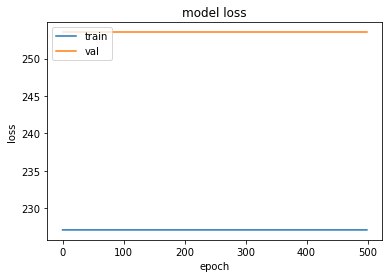

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Use `ADAM`

### Use `RMSPROP`

### Does it take different times to get the best accuracy? Why?

## In the end, what should be a feasible configuration of the Neural Network for this data?

# Common Errors

## The `kernel_initializer` Matters

## The `activation` Function Matters

## The `optimizer` Matters

## The Number of `epochs` Matters

## The `loss` Function Matters

## The Number of `epochs` Matters

# Neural Network's importance to find **Non-Linear Patterns** in the Data

> - The number of Neurons & Hidden Layers

https://towardsdatascience.com/beginners-ask-how-many-hidden-layers-neurons-to-use-in-artificial-neural-networks-51466afa0d3e

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.87287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

## Summary

- Mathematical Formula
- Weights / Kernel Initializer
- Loss Function
- Activation Function
- Optimizers

## What cannot you change arbitrarily of a Neural Network?

- Input Neurons
- Output Neurons
- Loss Functions
- Activation Functions